# Project 2: DSCI 311

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

An investigation of the potential correlation between drug decriminalization and drug overdose rates in the state of Oregon.

Overdose data is provided by the CDC at <https://www.cdc.gov/https://data.cdc.gov/api/views/xkb8-kh2a/rows.csv?accessType=DOWNLOAD&bom=true&format=true>.
The FBI provides drug criminalization data at <https://cde.ucr.cjis.gov/>

*Additionally, if we determine this is not enough information to do a full project on, I found statistics about homelessness in Oregon at <https://www.hudexchange.info/https://www.huduser.gov/portal/sites/default/files/xls/2007-2023-PIT-Counts-by-State.xlsb>, and the FBI provides more data about domestic violence, general property-related crime, etc.*

In 2020 the state of Oregon voted to decriminalize the posession of all drugs (when held in small quantities). Can we see anything correlated to this, ie, an larger increase of overdose rates in comparison to other states, more violence, etc?

## Step 1: Exploration

### Crime Dataset

Let's examine the narcotic crime dataset first. Initially, we can: 
1) Read in the crime dataset
2) Transpose it so that each row corresponds to a date
3) Format it so we have proper column headers, in lowercase
4) Reset the index to be 0-based, having the date as its own column

In [47]:
# read in the narcotics dataset
crime = pd.read_csv('narcotics.csv') 

# transpose so that each entry is a date
crime = crime.transpose()

# make the first row actually the column headers..
crime.columns = crime.iloc[0, :]

# and then drop that first row
crime = crime.iloc[1:, :] 

# reset the index to normal 0 based
crime = crime.reset_index() 

# and then rename the old index to be the date
crime = crime.rename(columns={'index':'date'}) 

# make the column names lowercase
crime.columns = map(str.lower, crime.columns) 

# shows that we have from Oct, 2014 to Oct, 2024
crime['date'].unique() 

array(['10-2014', '11-2014', '12-2014', '01-2015', '02-2015', '03-2015',
       '04-2015', '05-2015', '06-2015', '07-2015', '08-2015', '09-2015',
       '10-2015', '11-2015', '12-2015', '01-2016', '02-2016', '03-2016',
       '04-2016', '05-2016', '06-2016', '07-2016', '08-2016', '09-2016',
       '10-2016', '11-2016', '12-2016', '01-2017', '02-2017', '03-2017',
       '04-2017', '05-2017', '06-2017', '07-2017', '08-2017', '09-2017',
       '10-2017', '11-2017', '12-2017', '01-2018', '02-2018', '03-2018',
       '04-2018', '05-2018', '06-2018', '07-2018', '08-2018', '09-2018',
       '10-2018', '11-2018', '12-2018', '01-2019', '02-2019', '03-2019',
       '04-2019', '05-2019', '06-2019', '07-2019', '08-2019', '09-2019',
       '10-2019', '11-2019', '12-2019', '01-2020', '02-2020', '03-2020',
       '04-2020', '05-2020', '06-2020', '07-2020', '08-2020', '09-2020',
       '10-2020', '11-2020', '12-2020', '01-2021', '02-2021', '03-2021',
       '04-2021', '05-2021', '06-2021', '07-2021', 

Next, let's just take a look at what we have in our crime database based on our first few rows.

The values under our 'oregon' and 'united states' columns correspond to rates, per 100,000 people, of drug-related crimes. The clearances columns refer to the rate of cases in which law enforcement agencies have to clear/close their case by exceptional means, such as through arrest, being charged with crime, or being turned over to the court system for prosecution.

In [48]:
crime.head(10)

,date,oregon,united states,oregon clearances,united states clearances
0,10-2014,4.11,3.74,3.16,3.0
1,11-2014,0.58,2.8,0.44,2.24
2,12-2014,6.76,2.87,5.19,2.28
3,01-2015,13.4,4.53,9.56,3.68
4,02-2015,3.67,2.88,2.74,2.35
5,03-2015,4.72,3.9,3.59,3.15
6,04-2015,5.51,3.72,4.15,3.0
7,05-2015,9.56,3.8,8.07,3.08
8,06-2015,10.96,3.85,8.76,3.12
9,07-2015,14.38,3.92,12.53,3.18


What data type are values in our date column?

In [49]:
crime['date'].dtype

dtype('O')

We can convert our date column values to be a datetime object, which might make the dates easier to work with in the future.

In [50]:
crime['date'] = pd.to_datetime(crime['date'])

crime.head()

/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/1731666764.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['date'] = pd.to_datetime(crime['date'])


,date,oregon,united states,oregon clearances,united states clearances
0,2014-10-01,4.11,3.74,3.16,3.0
1,2014-11-01,0.58,2.8,0.44,2.24
2,2014-12-01,6.76,2.87,5.19,2.28
3,2015-01-01,13.4,4.53,9.56,3.68
4,2015-02-01,3.67,2.88,2.74,2.35


Let's look at the tail of our data next...

In [51]:
crime.tail(10)

,date,oregon,united states,oregon clearances,united states clearances
111,2024-01-01,NaN,NaN,NaN,NaN
112,2024-02-01,NaN,NaN,NaN,NaN
113,2024-03-01,NaN,NaN,NaN,NaN
114,2024-04-01,NaN,NaN,NaN,NaN
115,2024-05-01,NaN,NaN,NaN,NaN
116,2024-06-01,NaN,NaN,NaN,NaN
117,2024-07-01,NaN,NaN,NaN,NaN
118,2024-08-01,NaN,NaN,NaN,NaN
119,2024-09-01,NaN,NaN,NaN,NaN
120,2024-10-01,NaN,NaN,NaN,NaN


It looks like we don't really have any information for any crime that occurred in 2024. Let's confirm this.

In [52]:
crime_in_2024 = crime[crime['date'] > '2023-12-31']
crime_in_2024

,date,oregon,united states,oregon clearances,united states clearances
111,2024-01-01,NaN,NaN,NaN,NaN
112,2024-02-01,NaN,NaN,NaN,NaN
113,2024-03-01,NaN,NaN,NaN,NaN
114,2024-04-01,NaN,NaN,NaN,NaN
115,2024-05-01,NaN,NaN,NaN,NaN
116,2024-06-01,NaN,NaN,NaN,NaN
117,2024-07-01,NaN,NaN,NaN,NaN
118,2024-08-01,NaN,NaN,NaN,NaN
119,2024-09-01,NaN,NaN,NaN,NaN
120,2024-10-01,NaN,NaN,NaN,NaN


Yeah, there's nothing there. We can just drop these because we won't gain anything from having them. Let's look at the tail again to make sure we dropped all the NaN entries.

In [53]:
crime = crime[crime['date'] < '2024-01-01']
crime.tail(5)

,date,oregon,united states,oregon clearances,united states clearances
106,2023-08-01,14.89,29.01,11.03,21.91
107,2023-09-01,13.76,28.03,10.31,21.03
108,2023-10-01,14.81,26.98,10.84,20.35
109,2023-11-01,13.7,25.48,10.04,19.28
110,2023-12-01,15.45,24.75,11.87,18.84


Nice. We also need the rest of our data to be numerical, without NaN values in order to run descriptive statistics. 

In [54]:
crime[['oregon', 'united states', 'oregon clearances', 'united states clearances']] = crime[['oregon', 'united states', 'oregon clearances', 'united states clearances']].apply(pd.to_numeric)
# There was no need to implement error handling - all values converted to numeric, as expected

crime.head(3)

,date,oregon,united states,oregon clearances,united states clearances
0,2014-10-01,4.11,3.74,3.16,3.00
1,2014-11-01,0.58,2.80,0.44,2.24
2,2014-12-01,6.76,2.87,5.19,2.28


Next, let's run some descriptive statistics on our dataset.

In [55]:
display(crime['oregon'].describe()); display(crime['united states'].describe())

count    111.000000
mean      24.242072
std       13.931477
min        0.580000
25%       12.915000
50%       17.050000
75%       39.920000
max       48.930000
Name: oregon, dtype: float64

count    111.000000
mean      18.440450
std        9.902669
min        2.800000
25%       14.170000
50%       18.580000
75%       27.100000
max       40.600000
Name: united states, dtype: float64

The mean narcotic crime rate in Oregon is 24.24, as opposed to the United States mean of 18.44. However, the median values of both narcotic crime rates are not as far apart. The median narcotic crime rate in Oregon is 17.05, whereas the United States narcotic crime rate median is slightly higher at a rate of 18.58. 

The median value of the United States is closer to its mean value, whereas Oregon demonstrates a significantly higher mean value than its median. This suggests that the mean narcotic crime rate in Oregon is skewed by outliers in the greater portion of the data, which is something that we are not seeing in the general United States trends.

This skew is also supported by the difference in standard deviation from both groups. The Oregon data has a standard deviation of 13.93, whereas the United States data has a smaller standard deviation of 9.90. Oregon has a higher max rate than the United States as well at 48.93, compared to the United States max of 40.60.

How about the clearance rates?

In [56]:
display(crime['oregon clearances'].describe()); display(crime['united states clearances'].describe())

count    111.000000
mean      19.786486
std       12.207359
min        0.440000
25%        9.575000
50%       14.120000
75%       33.570000
max       40.010000
Name: oregon clearances, dtype: float64

count    111.000000
mean      14.148919
std        7.374314
min        2.240000
25%       10.930000
50%       14.280000
75%       20.525000
max       30.760000
Name: united states clearances, dtype: float64

Similar to the narcotic crime rates, the clearance rates also demonstrate Oregon having a higher mean than the United States, and a relatively similar median between the two groups. Oregon has a mean narcotic crime clearance rate of 19.78 compared to 14.14 in the United States, while their median clearance rates are 14.12 and 14.28, respectively.

The standard deviation of the Oregon clearances is 12.20, which is much higher than the United States standard deviation of 7.37. The maximum of the Oregon clearance rate is also still higher than that of the United States at 40.01 (compared to 30.76).

We can represent these descriptions visually through a boxplot:

/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/3194935459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crime_melted, y='Location', x='Rate', orient='h', palette=colors)
/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/3194935459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crime_clearance_melted, y='Location', x='Clearance Rate', orient='h', palette=colors)


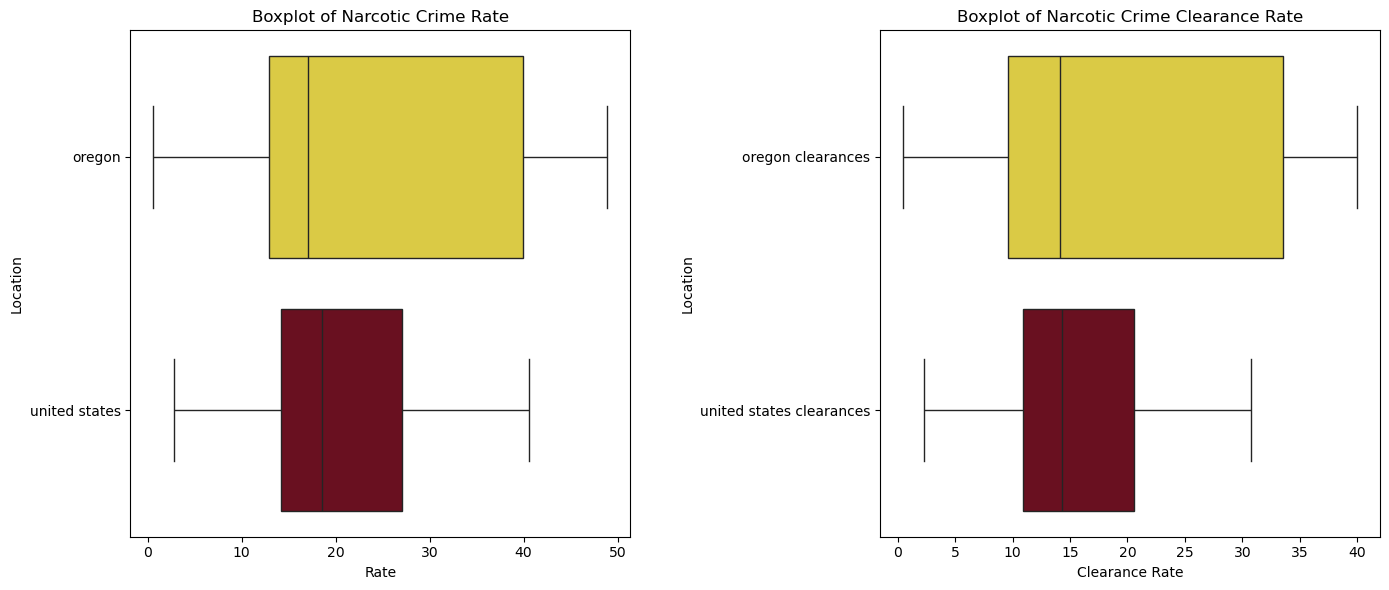

In [57]:
plt.figure(figsize=(14, 6))

colors = ['#f3de2c', '#780116']

plt.subplot(1, 2, 1)
crime_melted = pd.melt(crime[['oregon', 'united states']], var_name='Location', value_name='Rate')
sns.boxplot(data=crime_melted, y='Location', x='Rate', orient='h', palette=colors)
plt.title('Boxplot of Narcotic Crime Rate')
#plt.xticks(rotation=45)

plt.subplot(1,2,2)
crime_clearance_melted = pd.melt(crime[['oregon clearances', 'united states clearances']], var_name='Location', value_name='Clearance Rate')
sns.boxplot(data=crime_clearance_melted, y='Location', x='Clearance Rate', orient='h', palette=colors)
plt.title('Boxplot of Narcotic Crime Clearance Rate')
#plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

We can see exactly what we examined based on the descritive statistics above: though the two groups have very similar median, lower quantile, and minimum values, they differ in the greater portion of the data. The third quantile of our Oregon data, in both the crime rate and clearance rate, is either on par with or greater than the maximum United States values. The spread of our Oregon data from the median to the maximum value is much greater than that of the United States.

Lets also assess visually through histograms of both data sets:

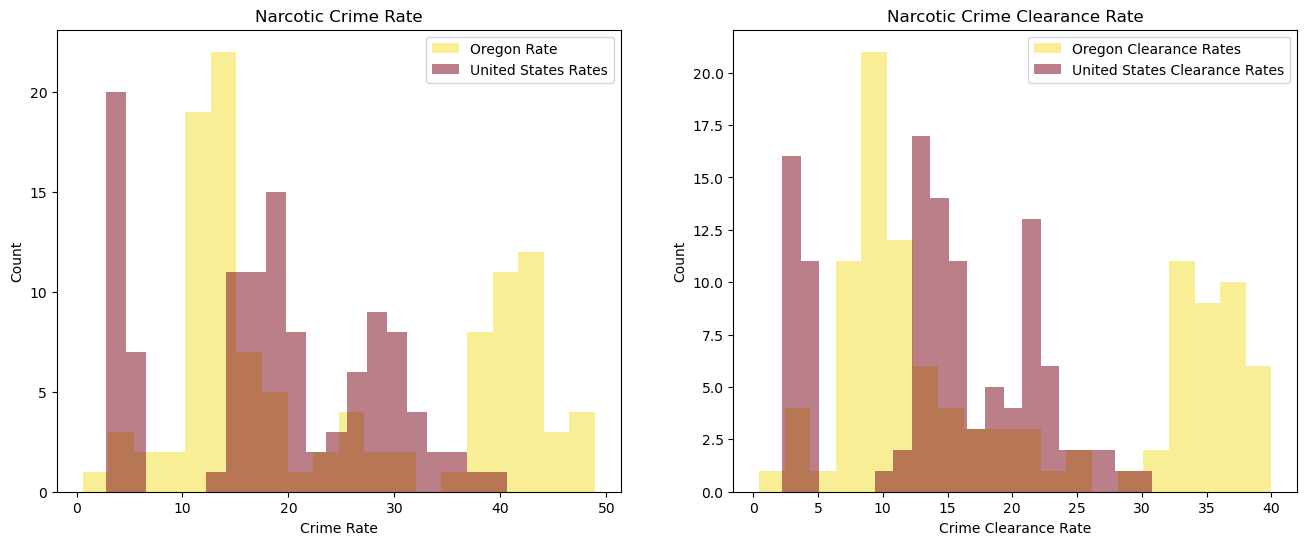

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].hist(x=crime['oregon'], label='Oregon Rate', color='#f3de2c', alpha=0.5, bins=20)
ax[0].hist(x=crime['united states'], label='United States Rates', color='#780116', alpha=0.5, bins=20)
ax[0].set_title('Narcotic Crime Rate')
ax[0].set_xlabel('Crime Rate')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].hist(x=crime['oregon clearances'], label='Oregon Clearance Rates', color='#f3de2c', alpha=0.5, bins=20)
ax[1].hist(x=crime['united states clearances'], label='United States Clearance Rates', color='#780116', alpha=0.5, bins=20)
ax[1].set_title('Narcotic Crime Clearance Rate')
ax[1].set_xlabel('Crime Clearance Rate')
ax[1].set_ylabel('Count')
ax[1].legend()


In both instances above, our United States rates appear to have three distinct chunks of data (at left one peak, and at right three peaks). There also appears to be a gap in the data between the first and second peaks. We could potentially say that the United States narcotic crime rates at left demonstrate a right-skewed distribution.

Similarly, in both cases the Oregon data is represented by a bimodal distribution, with a higher peak in the lower portion of the data and additional noise in the maximum range. 

In [59]:
# TODO ? How to normalize these two distributions/will it be necessary to do that?

Let's also take a look at how these rates tend to fluctuate over time.

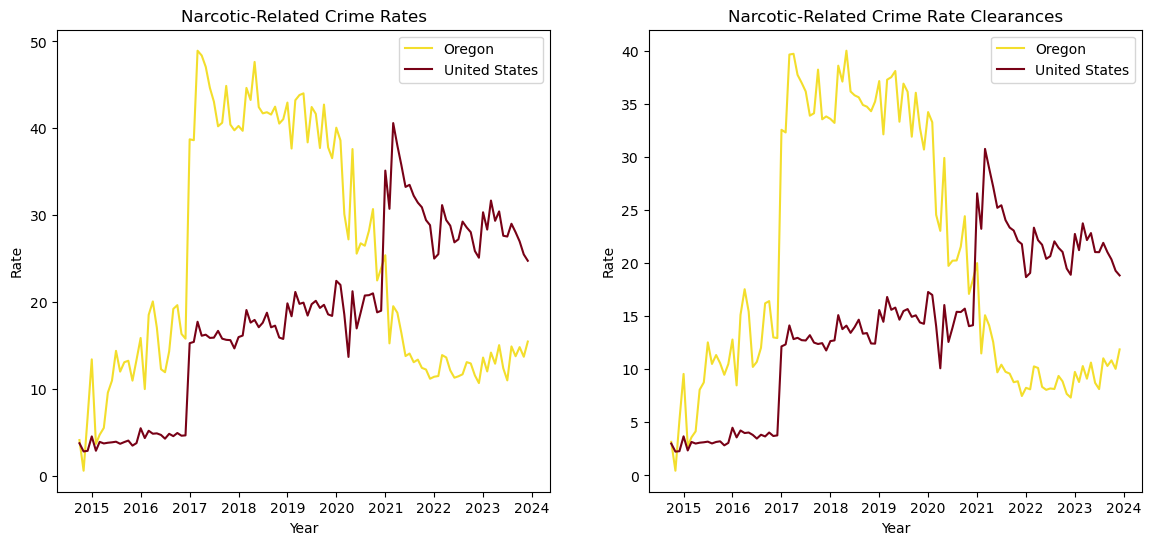

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(crime['date'], crime['oregon'], color='#f3de2c', label='Oregon')
ax[0].plot(crime['date'], crime['united states'], color='#780116', label='United States')
ax[0].set_title('Narcotic-Related Crime Rates')
ax[0].set_xlabel('Year'); ax[0].set_ylabel('Rate')
ax[0].legend(); 

ax[1].plot(crime['date'], crime['oregon clearances'], color='#f3de2c', label='Oregon')
ax[1].plot(crime['date'], crime['united states clearances'], color='#780116', label='United States')
ax[1].set_title('Narcotic-Related Crime Rate Clearances')
ax[1].set_xlabel('Year'); ax[1].set_ylabel('Rate')
ax[1].legend(); #ax[1].grid()

As demonstrated by the above line plots, over time our two groups do not exhibit similar crime trends. Oregon drug-related crimes hit a distinct peak between 2017 and 2018, and then eventually hit a massive decline after the year 2020, before roughly leveling out between 2021 and 2024. In the United States generally, drug-related crimes have been on increasing over time, with distinct upward spikes around roughly 2017 and 2021.

The way that Oregon has chosen to classify crime most likely has an impact on the way that crime has trended in our data. In November of 2020, Oregon chose to decriminalize the posession of any drug in small quantities. After this event, the rate of narcotic-related crime significantly decreased in the state.

### Overdose Dataset

Next, let's examine our dataset on overdose statistics.

In [61]:
# Read in the csv
drug_overdose = pd.read_csv('drug_overdose.csv') 

# Lowercase the column names
drug_overdose.columns = map(str.lower, drug_overdose.columns)

# Display the first ten rows
drug_overdose.head(10)

/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/2186011259.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_overdose = pd.read_csv('drug_overdose.csv')


,state,year,month,period,indicator,data value,percent complete,percent pending investigation,state name,footnote,footnote symbol,predicted value
0,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
5,AK,2015,April,12 month-ending,Methadone (T40.3),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
6,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
7,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126
8,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
9,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


We won't really need all of the columns, so we can select only those that will be relevant for our investigation.

In [62]:
drug_overdose = drug_overdose[['state', 'year', 'month', 'indicator', 'data value']]

Anything that is NaN will not be helpful to us (after selecting the desired columns), so we can drop them.

In [63]:
drug_overdose = drug_overdose.dropna()
drug_overdose.head()

,state,year,month,indicator,data value
7,AK,2015,April,Number of Drug Overdose Deaths,126
9,AK,2015,April,Percent with drugs specified,88.0952381
11,AK,2015,April,Number of Deaths,"4,133"
17,AK,2015,August,Percent with drugs specified,87.90322581
18,AK,2015,August,Number of Deaths,"4,222"


What data types are we working with? 

In [64]:
display(drug_overdose['year'].dtype); display((drug_overdose['data value'].dtype))

dtype('int64')

dtype('O')

So it looks like we have a mix of types in our data value values... 

Let's

1) Ensure the data type of each value is a string

2) Remove any commas so that we can easily convert it to numeric data

3) Convert the values to be numeric

In [65]:
drug_overdose['data value'] = pd.to_numeric(drug_overdose['data value'].apply(str).str.replace(',', ""))
drug_overdose['data value'].dtype

dtype('float64')

First, let's explore how different drugs resulted in death in Oregon. 

Later we can examine how Oregon death rates compare to the United States as a whole, as well as to other states.

Let's start by filtering for data we have in Oregon. 

In [66]:
oregon_overdose = drug_overdose[drug_overdose['state'] == 'OR']

oregon_overdose

,state,year,month,indicator,data value
48138,OR,2015,April,Natural & semi-synthetic opioids (T40.2),133.0
48139,OR,2015,April,"Natural, semi-synthetic, & synthetic opioids, ...",217.0
48140,OR,2015,April,"Natural & semi-synthetic opioids, incl. methad...",188.0
48141,OR,2015,April,Cocaine (T40.5),18.0
48142,OR,2015,April,"Opioids (T40.0-T40.4,T40.6)",341.0
...,...,...,...,...,...
49489,OR,2024,May,"Opioids (T40.0-T40.4,T40.6)",1375.0
49490,OR,2024,May,Cocaine (T40.5),186.0
49491,OR,2024,May,Natural & semi-synthetic opioids (T40.2),135.0
49492,OR,2024,May,Number of Deaths,42679.0


It looks like we can see how many deaths occurred as a result of various types of drugs. Let's plot a line graph which represents death counts over time, specifying by the indicator type. 

Text(0.5, 0, 'Year')

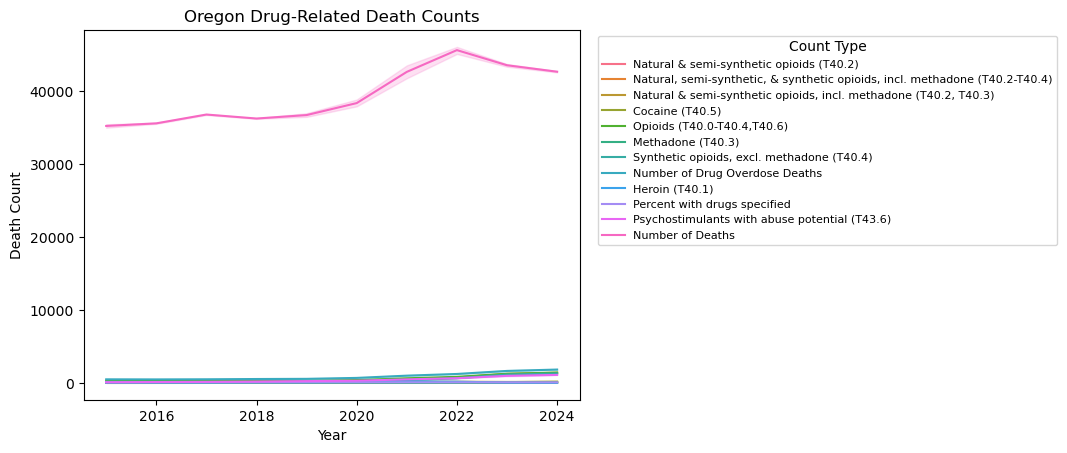

In [67]:
sns.lineplot(data=oregon_overdose, x='year', y='data value', hue='indicator')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Count Type')
plt.title('Oregon Drug-Related Death Counts'); plt.ylabel('Death Count'); plt.xlabel('Year')

Obviously the total number of deaths is going to be much greater than each distinct drug-related death in Oregon. Though, it is interesting to see that the line steepens in slope at the year 2020. Let's take the total Number of Deaths out of our dataset for now, to get a better view of each drug type's death count.

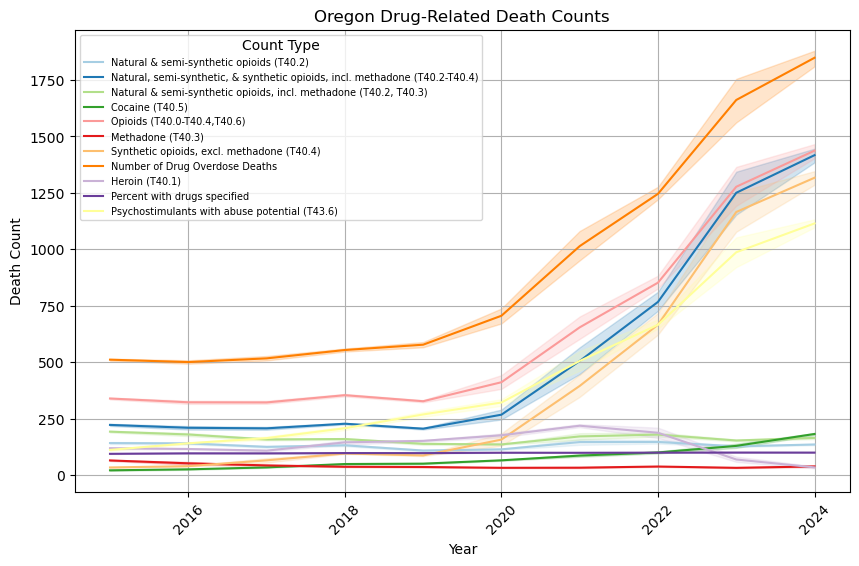

In [68]:
# Filter out the Number of Deaths column to get a clearer view of the rest of the data
oregon_overdose_no_total = oregon_overdose[oregon_overdose['indicator'] != 'Number of Deaths']

# It was hard to see... make a distinct color palette.
palette = sns.color_palette("Paired", 11)

plt.figure(figsize=(10,6))
# Plot in the same way as above
sns.lineplot(data=oregon_overdose_no_total, x='year', y='data value', hue='indicator', palette=palette)
plt.legend(fontsize=7, loc='upper left', title='Count Type')
plt.title('Oregon Drug-Related Death Counts'); plt.ylabel('Death Count'); plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('OregonDeath.png')

Drug overdose deaths in Oregon, in general, rose after the year 2020. However, it looks like four drugs specifically contribute the general trend of drug-related deaths rising after the year 2020: 'Opiods', 'Natural, semi-synthetic, & synthetic opiods, inc. methadone (T40.2-T40.4)', 'Synthetic opiods, excl methadone (T40.4)', and 'Psychostimulants with abuse potential (T43.6)'. 

To me, it is exceptionally interesting that certain different types of opioids are associated in an increase in deaths after 2020, whereas others are not. I also had no idea what the distinction between opiod types was, so let's investigate that a bit...

Some examples of of natural opiods include:

* morphine
* codeine

Some examples of semi-synthetic opiods include:

* heroin
* oxycodone
* hydrocodone
* buprenorphine

And some examples of synthetic opiods include:

* fentanyl
* methadone
* tramadol

Looking at the graph, in Oregon after the year 2020, synthetic opiods are primarily shown increasing in resulting death counts––regardless of whether that count includes methadone. Psychostimulants with abuse potential also appear to rise after 2020. We can see that solely natural and semi-synthetic opiods (with and without methadone) do not spike up after the year 2020. 

Let's broaden the scope of our exploration again, and look at how drug deaths have been trending in Washington––a neighboring, somewhat similar state to Oregon––as well as generally across the United States.

Text(0.5, 0, 'Year')

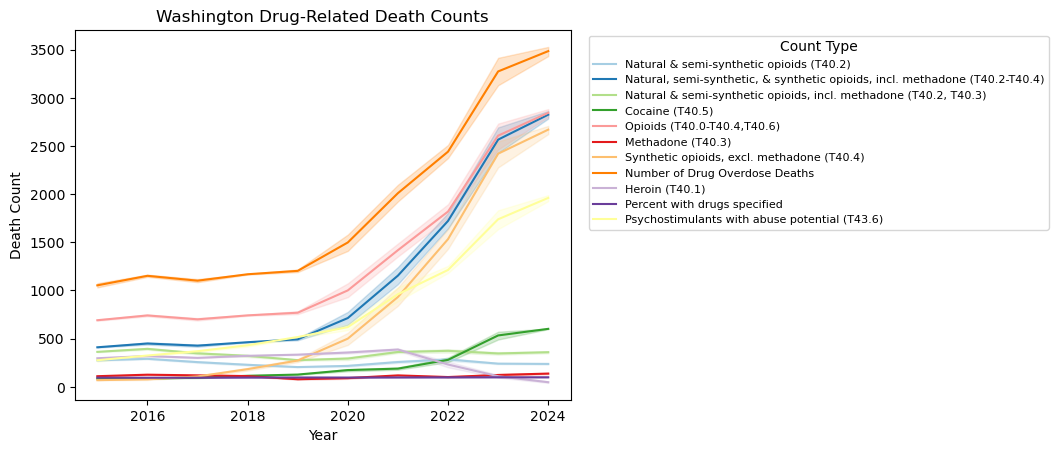

In [69]:
# Copy and paste from above, but with Washington...
washington_overdose = drug_overdose[drug_overdose['state'] == 'WA']
washington_overdose_no_total = washington_overdose[(washington_overdose['indicator'] != 'Number of Deaths')]

sns.lineplot(data=washington_overdose_no_total, x='year', y='data value', hue='indicator', palette=palette)
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Count Type')
plt.title('Washington Drug-Related Death Counts'); plt.ylabel('Death Count'); plt.xlabel('Year')

In Washington, it appears that the same general trends seen in Oregon apply after the year 2020––an increase in opiod-related deaths (specifically counts which include synthetic opiods) as well as psychostimulants with abuse potential.

How about generally within the United States? 

Let's group our dataset by the year and indicator, taking the median of the data value column, to give us the median death count per indicator, by year, across the United States. We will use the median so that our data is not influenced as heavily by outliers.

In [70]:
united_states_overdose = drug_overdose.groupby(by=['year', 'indicator'])[['data value']].median().reset_index()
united_states_overdose.head()

,year,indicator,data value
0,2015,Cocaine (T40.5),87.0
1,2015,Heroin (T40.1),163.5
2,2015,Methadone (T40.3),69.0
3,2015,Natural & semi-synthetic opioids (T40.2),260.0
4,2015,"Natural & semi-synthetic opioids, incl. methad...",333.0


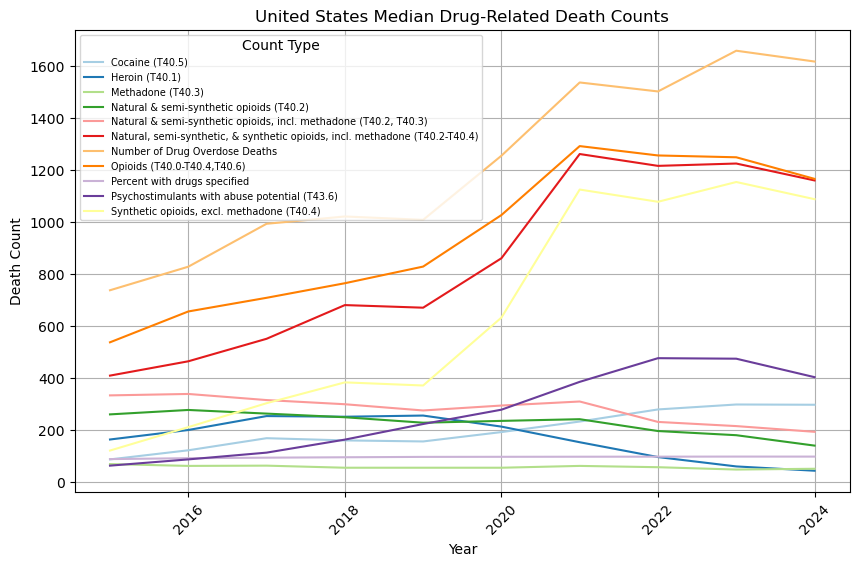

In [71]:
# Copy and paste from above, but with United States average...
plt.figure(figsize=(10,6))
united_states_overdose_no_total = united_states_overdose[(united_states_overdose['indicator'] != 'Number of Deaths')]

sns.lineplot(data=united_states_overdose_no_total, x='year', y='data value', hue='indicator', palette=palette)
plt.legend(fontsize=7, loc='upper left', title='Count Type')
plt.title('United States Median Drug-Related Death Counts'); plt.ylabel('Death Count'); plt.xlabel('Year')
plt.xticks(rotation=45); plt.grid()
plt.savefig('USDeath.png')

Looking at the median trends across the United States, it appears that the same primary drug groups are responsible for the increase in drug-related death counts after the year 2020, with the exception of psychostimulants. Psychostimulant death rates continued to steadily increase between 2020 and 2022, but not as extremely as they did in Oregon or Washington. 

Additionally, while the three primary drug groups we observed (including synthetic opiods) increased in death count after the year 2020, at approximately 2021 the slope of each line decreases and/or maintains a flat slope until 2024. 

It is also worth noting that the scales of the y-axis on these three graphs are somewhat different. Oregon is only slightly greater than the scale of the United States, but the y-axis nearly doubles on our graph of Washington death counts. 

### Combining Dataframes

Let's join the two dataframes based on their respective months. To do this, we can:

(1) Extract the month and year from our `crime` dataframe, and make those separate columns within it

(2) Convert values in the `month` column of our `drug_overdose` dataframe to numeric values, so that the keys we are joining on match

(3) Merge both dataframes via the year and month values

In [72]:
# Extract the month from the datetime object
crime['month'] = crime['date'].dt.month

# Extract the year from the datetime object
crime['year'] = crime['date'].dt.year

crime.head()

,date,oregon,united states,oregon clearances,united states clearances,month,year
0,2014-10-01,4.11,3.74,3.16,3.00,10,2014
1,2014-11-01,0.58,2.80,0.44,2.24,11,2014
2,2014-12-01,6.76,2.87,5.19,2.28,12,2014
3,2015-01-01,13.40,4.53,9.56,3.68,1,2015
4,2015-02-01,3.67,2.88,2.74,2.35,2,2015


In [73]:
# Convert our month names to numeric values
drug_overdose['numeric_month'] = drug_overdose['month'].replace({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

drug_overdose.head()

,state,year,month,indicator,data value,numeric_month
7,AK,2015,April,Number of Drug Overdose Deaths,126.000000,4
9,AK,2015,April,Percent with drugs specified,88.095238,4
11,AK,2015,April,Number of Deaths,4133.000000,4
17,AK,2015,August,Percent with drugs specified,87.903226,8
18,AK,2015,August,Number of Deaths,4222.000000,8


In [74]:
crime_overdose_merged = pd.merge(crime, drug_overdose, left_on=['month', 'year'], right_on=['numeric_month', 'year'], how='left')
crime_overdose_merged

crime_overdose_merged[crime_overdose_merged.isnull().any(axis=1)]

,date,oregon,united states,oregon clearances,united states clearances,month_x,year,state,month_y,indicator,data value,numeric_month
0,2014-10-01,4.11,3.74,3.16,3.00,10,2014,NaN,NaN,NaN,NaN,NaN
1,2014-11-01,0.58,2.80,0.44,2.24,11,2014,NaN,NaN,NaN,NaN,NaN
2,2014-12-01,6.76,2.87,5.19,2.28,12,2014,NaN,NaN,NaN,NaN,NaN


There are only 3 rows with NaN values –– this is because our crime dataframe begins at the end of 2014, and our drug overdose dataframe begins in 2015.

We can drop values of these three months... which is effectively the same as doing an inner join.

In [75]:
crime_overdose_merged = crime_overdose_merged.dropna()

crime_overdose_merged.head()

,date,oregon,united states,oregon clearances,united states clearances,month_x,year,state,month_y,indicator,data value,numeric_month
3,2015-01-01,13.4,4.53,9.56,3.68,1,2015,AK,January,Number of Deaths,4034.000000,1.0
4,2015-01-01,13.4,4.53,9.56,3.68,1,2015,AK,January,Percent with drugs specified,89.682540,1.0
5,2015-01-01,13.4,4.53,9.56,3.68,1,2015,AK,January,Number of Drug Overdose Deaths,126.000000,1.0
6,2015-01-01,13.4,4.53,9.56,3.68,1,2015,AL,January,Number of Deaths,49543.000000,1.0
7,2015-01-01,13.4,4.53,9.56,3.68,1,2015,AL,January,Percent with drugs specified,47.692308,1.0


Let's take a look at the Oregon merged data.

In [76]:
oregon_merged = crime_overdose_merged[crime_overdose_merged['state'] == 'OR']
oregon_merged.head()

,date,oregon,united states,oregon clearances,united states clearances,month_x,year,state,month_y,indicator,data value,numeric_month
211,2015-01-01,13.4,4.53,9.56,3.68,1,2015,OR,January,Cocaine (T40.5),20.0,1.0
212,2015-01-01,13.4,4.53,9.56,3.68,1,2015,OR,January,"Natural, semi-synthetic, & synthetic opioids, ...",212.0,1.0
213,2015-01-01,13.4,4.53,9.56,3.68,1,2015,OR,January,"Opioids (T40.0-T40.4,T40.6)",340.0,1.0
214,2015-01-01,13.4,4.53,9.56,3.68,1,2015,OR,January,"Synthetic opioids, excl. methadone (T40.4)",32.0,1.0
215,2015-01-01,13.4,4.53,9.56,3.68,1,2015,OR,January,Natural & semi-synthetic opioids (T40.2),134.0,1.0


Below is a scatterplot that compares the narcotic crime rate in Oregon with the total death count.

Text(0.5, 1.0, 'Oregon Narcotic Crime Rate vs Death Count')

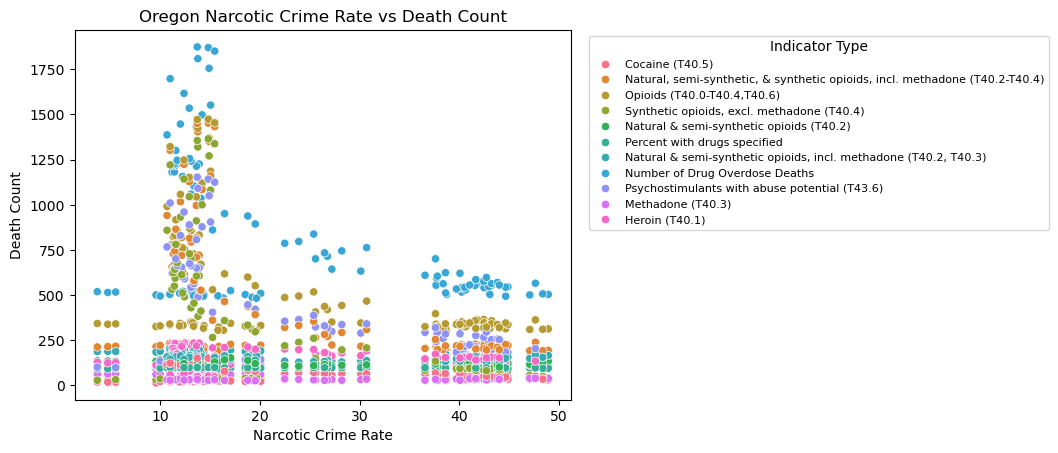

In [77]:
oregon_merged_no_total_deaths = oregon_merged[oregon_merged['indicator'] != 'Number of Deaths']

sns.scatterplot(data=oregon_merged_no_total_deaths, x='oregon', y='data value', hue='indicator')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Indicator Type')
plt.ylabel('Death Count'); plt.xlabel('Narcotic Crime Rate'); plt.title('Oregon Narcotic Crime Rate vs Death Count')

The above graph looks very noisy and difficult to read, so let's focus in on the four indicator types we emphasized above.

Text(0.5, 1.0, 'Oregon Narcotic Crime Rate vs Death Count (Opiods)')

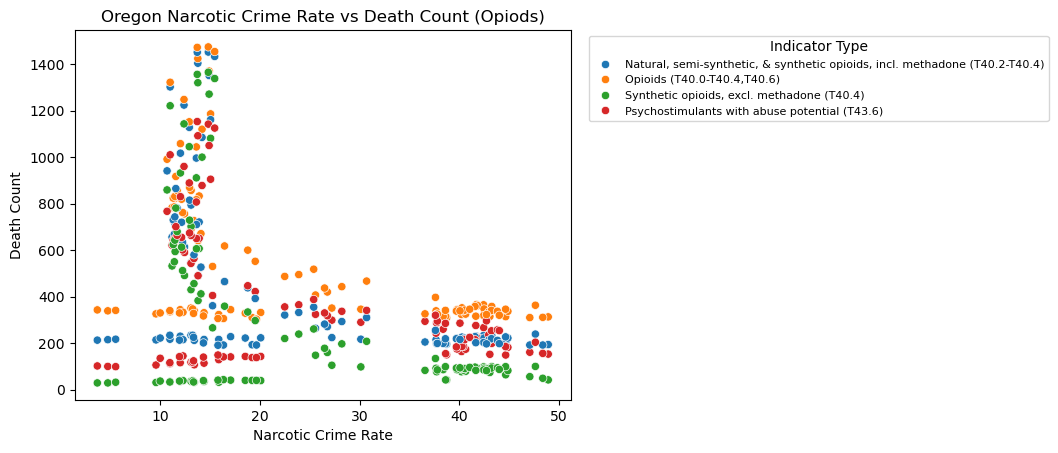

In [78]:
oregon_merged_opiods = oregon_merged[(oregon_merged['indicator'] == 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)')
                                     | (oregon_merged['indicator'] == 'Opioids (T40.0-T40.4,T40.6)')
                                     | (oregon_merged['indicator'] == 'Synthetic opioids, excl. methadone (T40.4)')
                                     | (oregon_merged['indicator'] == 'Psychostimulants with abuse potential (T43.6)')
]

#oregon_merged['indicator'].unique() # to copy and paste indicator values more easily

sns.scatterplot(data=oregon_merged_opiods, x='oregon', y='data value', hue='indicator')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Indicator Type')
plt.xlabel('Narcotic Crime Rate'); plt.ylabel('Death Count'); plt.title('Oregon Narcotic Crime Rate vs Death Count (Opiods)')

Looking at these indicator types, there appear to possibly be two clear trends: a seemingly logarithmic relationship between narcotic crime rate and death count, and a constant, flat relationship between the two variables.

In November of 2020, Oregon passed the legislation which decriminalized posession of drugs in small quantities. Are trends in our scatterplot distinct depending on whether they were before or after this law?

/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/3823376329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_merged_opiods['before_law'] = oregon_merged_opiods['date'] < '2020-11-01'


Text(0.5, 1.0, 'Oregon Narcotic Crime Rate vs Death Count (Opiods)')

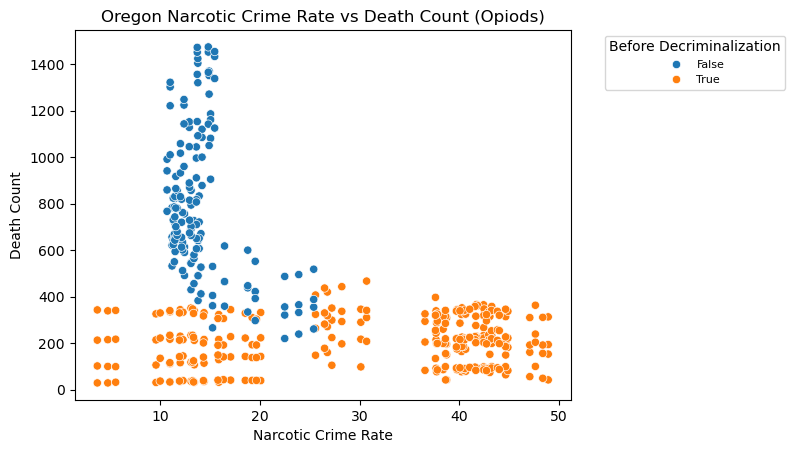

In [79]:
oregon_merged_opiods['before_law'] = oregon_merged_opiods['date'] < '2020-11-01'

sns.scatterplot(data=oregon_merged_opiods, x='oregon', y='data value', hue='before_law')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.25,1), title='Before Decriminalization')
plt.xlabel('Narcotic Crime Rate'); plt.ylabel('Death Count'); plt.title('Oregon Narcotic Crime Rate vs Death Count (Opiods)')

Above, we can clearly see two distinct trends based on whether or not the point was recorded before or after Oregon's decriminalization laws. Before the decriminalization, we see no correlation between narcotic crime rate and opioid death counts (the scatterplot looks flat). After the decriminalization, we see a more curved, potentially logarithmic scatter, in which a higher narcotic crime rate is generally somewhat correlated with a lower death count.

This may seem counter intuitive, but given that Oregon passed legislation which decriminalized the posession of small amounts of narcotics, it is entirely possible that the crime is still occurring at equal or increased rates––we are just not recording it in the same manner, and thus recording it less frequently. 

The values observed after the year 2020 occur within the narcotic crime rate range of approximately 10 to 25, which is a much smaller rance than that of pre-decriminalization. After 2020 we also see more extreme death counts, ranging from 200 to above 1400, which is quite extensive compared to the maximum death count pre-decriminalization (roughly 500).

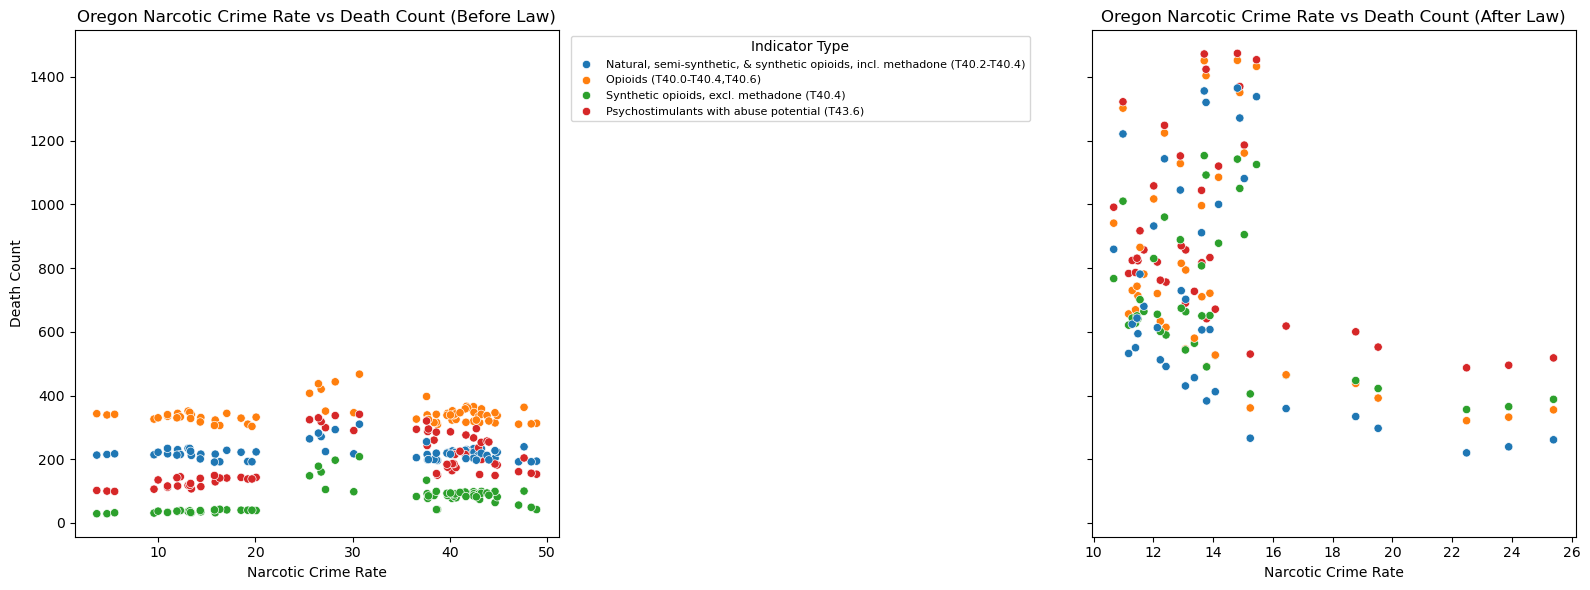

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

oregon_pre_law = oregon_merged_opiods[oregon_merged_opiods['before_law'] == True]
oregon_post_law = oregon_merged_opiods[oregon_merged_opiods['before_law'] == False]

# Plot for pre-law data
sns.scatterplot(data=oregon_pre_law, x='oregon', y='data value', hue='indicator', ax=ax[0])
ax[0].legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5, 1), title='Indicator Type')
ax[0].set_xlabel('Narcotic Crime Rate')
ax[0].set_ylabel('Death Count')
ax[0].set_title('Oregon Narcotic Crime Rate vs Death Count (Before Law)')

# Plot for post-law data
sns.scatterplot(data=oregon_post_law, x='oregon', y='data value', hue='indicator', ax=ax[1], legend=False)
#ax[1].legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5, 1), title='After Decriminalization')
ax[1].set_xlabel('Narcotic Crime Rate')
ax[1].set_ylabel('Death Count')  # Remove redundant y-label to avoid clutter
ax[1].set_title('Oregon Narcotic Crime Rate vs Death Count (After Law)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Above, we can see again the two trends described depending on whether the values plotted are before or after Oregon's decriminalization laws, also additionally specified by the indicator type.

Next, let's take a look at these same relationships, but on a broader scale. Essentially, let's repeat what we did above, but for the entirety of the United States rather than just in Oregon.

Text(0.5, 1.0, 'United States Narcotic Crime Rate vs Death Count')

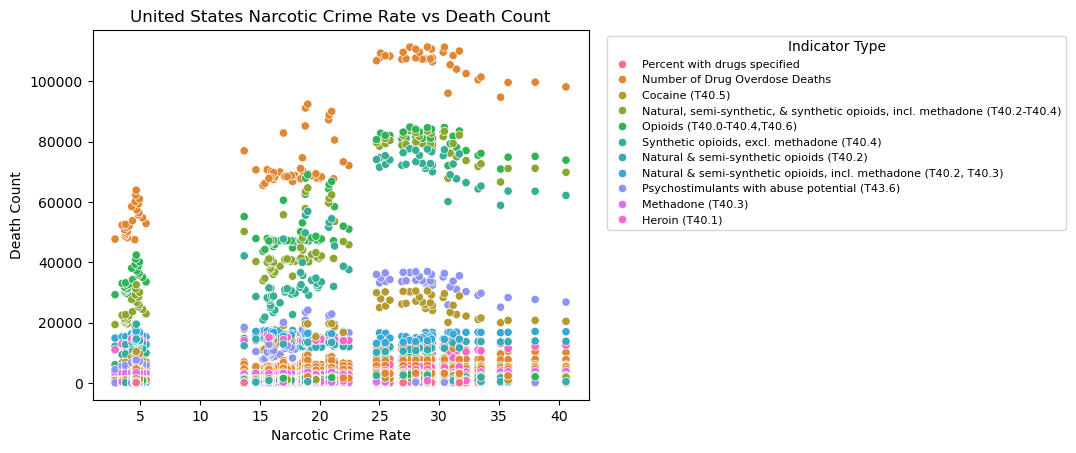

In [81]:
crime_overdose_merged.head()

crime_overdose_merged_no_total = crime_overdose_merged[crime_overdose_merged['indicator'] != 'Number of Deaths']

sns.scatterplot(data=crime_overdose_merged_no_total, x='united states', y='data value', hue='indicator')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Indicator Type')
plt.ylabel('Death Count'); plt.xlabel('Narcotic Crime Rate'); plt.title('United States Narcotic Crime Rate vs Death Count')

Once again, this appears very noisy, so let's focus in on a few select groups.

Text(0.5, 1.0, 'United States Narcotic Crime Rate vs Death Count')

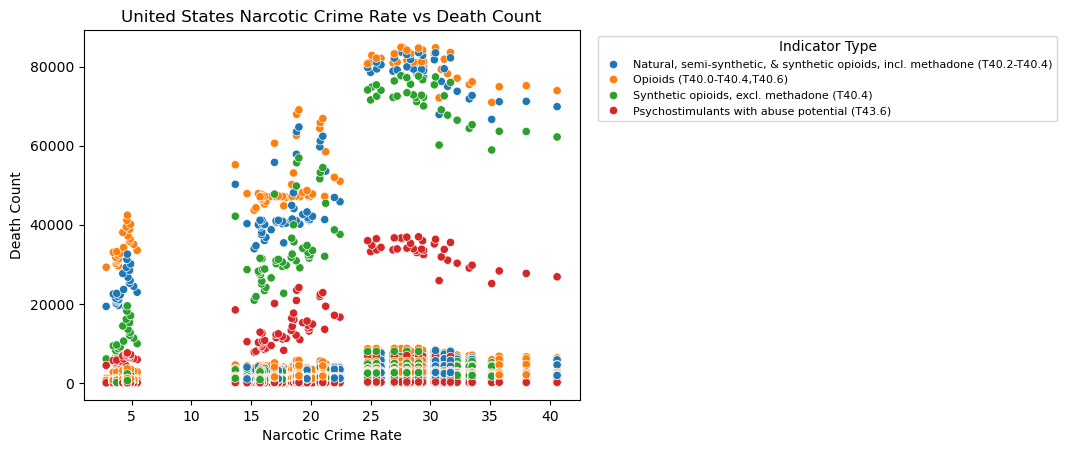

In [82]:
merged_opiods = crime_overdose_merged = crime_overdose_merged[(crime_overdose_merged['indicator'] == 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)')
                                     | (crime_overdose_merged['indicator'] == 'Opioids (T40.0-T40.4,T40.6)')
                                     | (crime_overdose_merged['indicator'] == 'Synthetic opioids, excl. methadone (T40.4)')
                                     | (crime_overdose_merged['indicator'] == 'Psychostimulants with abuse potential (T43.6)')
]

sns.scatterplot(data=merged_opiods, x='united states', y='data value', hue='indicator')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5,1), title='Indicator Type')
plt.ylabel('Death Count'); plt.xlabel('Narcotic Crime Rate'); plt.title('United States Narcotic Crime Rate vs Death Count')

We still see two distinct trends in our dataset, yet here we see a somewhat positive relationship between narcotic crime rate and death count with the exception of the flat noise that is present at the bottom of our dataset. Let's see if separating before and after 2020 allows us to see some distinct trends, as it did in our Oregon data.

Text(0.5, 1.0, 'United States Narcotic Crime Rate vs Death Count (Opiods)')

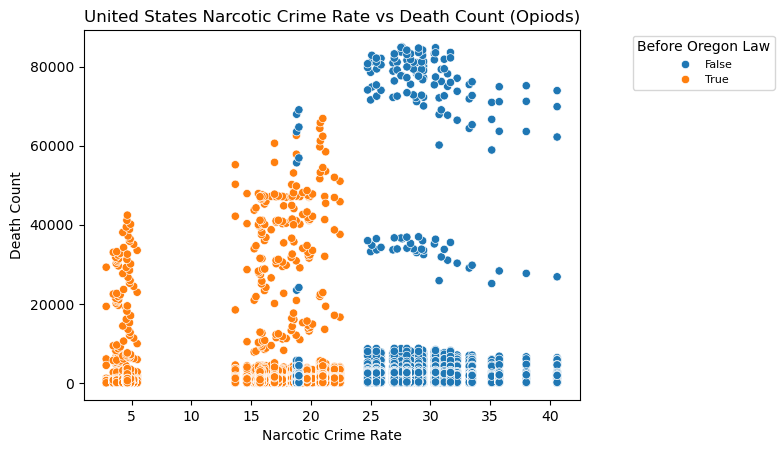

In [83]:
merged_opiods['before_law'] = merged_opiods['date'] < '2020-11-01'

sns.scatterplot(data=merged_opiods, x='united states', y='data value', hue='before_law')
plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.25,1), title='Before Oregon Law')
plt.xlabel('Narcotic Crime Rate'); plt.ylabel('Death Count'); plt.title('United States Narcotic Crime Rate vs Death Count (Opiods)')

The distinction between pre and post 2020 here is interesting because it is not similar to what we observed in our Oregon dataset, yet still insightful. The data demonstrates that pre-2020, narcotic crime rates in the United States were generally much lower than they are post-2020. We can see this visually via the scatterplot by the fact that pre and post 2020 almost perfectly vertically splits our dataset in half.

We can also see some pretty distinct gaps in the dataset visually. There appear to be minimal narcotic crime rates between 5 and 15, and additionally post 2020 there appear to be two distinct gaps between death count values.

I would not say that generally, in the United States, there is much of a linear correlation between narcotic crime rate and death count. Any positive correlation appears very slight.

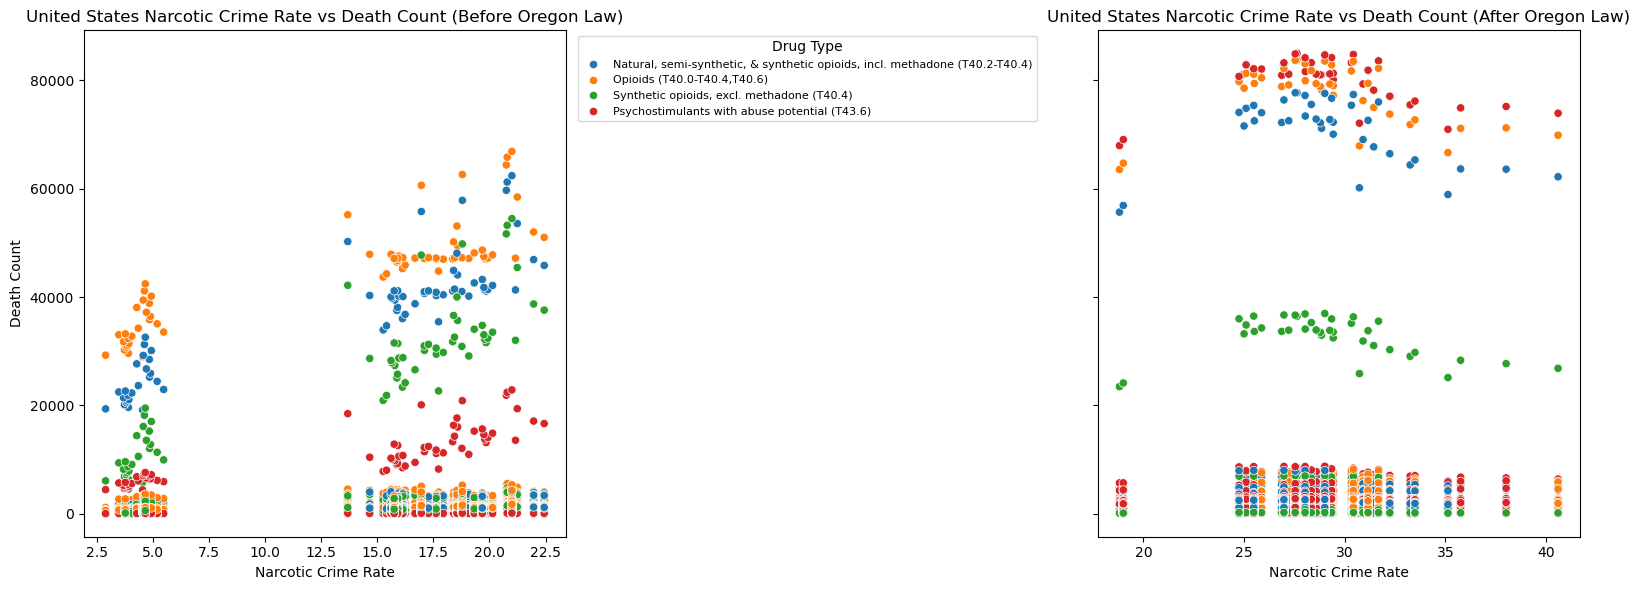

In [84]:
united_states_before = merged_opiods[merged_opiods['before_law'] == True]

united_states_after = merged_opiods[merged_opiods['before_law'] == False]

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for pre-law data
sns.scatterplot(data=united_states_before, x='united states', y='data value', hue='indicator', ax=ax[0])
ax[0].legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5, 1), title='Drug Type')
ax[0].set_xlabel('Narcotic Crime Rate')
ax[0].set_ylabel('Death Count')
ax[0].set_title('United States Narcotic Crime Rate vs Death Count (Before Oregon Law)')

# Plot for post-law data
sns.scatterplot(data=united_states_after, x='united states', y='data value', hue='indicator', ax=ax[1], legend=False)
#ax[1].legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5, 1), title='After Decriminalization')
ax[1].set_xlabel('Narcotic Crime Rate')
ax[1].set_ylabel('Death Count')  # Remove redundant y-label to avoid clutter
ax[1].set_title('United States Narcotic Crime Rate vs Death Count (After Oregon Law)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Another notable implication of the visual above is that the scale of our x axes differ in the above graphs. After Oregon law in 2020, narcotic crime rates increased by quite a bit generally within the United States. Rather than holding the range of 2.5 to 22.5, the axis is shifted significantly higher to a range of approximately 15 to 45.

### Initial Impressions...

*of narcotic crime rates:*

* When examining the distribution of narcotic crime rates in Oregon, as compared to the United States, there is a greater maximum, and greater variation in the upper portion of our data (as demonstrated by the paired boxplots). From this, we can see that Oregon has more instances of higher crime rates than the United States generally, and that these instances have a larger spread; ie, both a larger proportion of crime, which additionally varies quite a bit.

* By examining overlapping histograms of narcotic crime rates in Oregon and the United States, we can also emphasize that the United States has a somewhat right-skewed distribution with some gaps; ie, there are few instances of high crime rates overall, and a majority of our crime rates are either low or in the middle range. Contrastingly, our Oregon crime rates appear to show a bimodal distribution, in which a majority of the data appears in a low-middle range peak, with another slightly smaller peak at the upper part of the range; ie, Oregon crime rates are often either somewhat low, or somewhat high––with minimal data supporting the area between these two peaks.

* Line graphs of how the two rates fluctuate over time show that Oregon generally has a much higher narcotic crime rate than the United States, and that the two do not increase or decrease in the same way post-2020; ie, in Oregon the narcotic crime rate decreases and then flattens, whereas the United States narcotic crime rate increases and then flattens.

*of drug-related death counts:*

* In approximately 2019, an increase of drug-related deaths occurred in Oregon, Washington, and the United States. As demonstrated by the line graphs, these deaths continued to increase post-2021, which was not generally seen in the United States (the slope of the lines flatten after a quick upward slope). The drug groups primarily responsible for such an increase are opiods, more specifically opiods of the synthetic variety. In Oregon and Washington, psychostimulants with abuse potential also increased in death count, which was not seen generally in the United States.

*of the relationship between these two concepts:*

* In Oregon, there are two distinct trends in the correlation between narcotic crime rate and death counts in Oregon, depending on whether or not the value is before or after Oregon's 2020 drug decriminalization legislation; before such legislation, there appears to be no correlation between narcotic crime rate and death counts, whereas after there appears to be a somewhat logarithmic relationship.

* In the United States, there appears to be no distinct correlation between narcotic crime rates and death counts, both before and after 2020. Pre-2020, there is an extremely slight positive correlation between the two variables, but there are also a lot of data which demonstrates minimal death counts vs varying narcotic crime rates. However, we can distinctly see that United States narcotic crime rates increased after the year 2020 (which was also supported by our prior line graph).

Generally, my findings in this exploration were quite surprising to me. I was expecting to see a greater positive correlation between narcotic crime rate and death counts. In the case of Oregon, it was interesting to examine how post-2020, a smaller narcotic drug rate did not necessarily correspond with less death, which leads me to think that although the drug instances are no longer recorded in the same manner, they did not disappear. The drug use is still there, if not heightened, regardless of it being less documented (as demonstrated by the significant instances of drug-related death). 

Including Washington was also insightful to me, because it is a comparable state to Oregon despite its legislation not being exactly the same. From this, and the fact that in 2019 drug-related deaths increased generally within the United States before trends began to flatten, we can see that though Oregon follows some unique trends it is still one state in a larger system where drug-related deaths generally increased. The pandemic, etc., most likely influenced the associations we see in a dramatic way, and as such it would be unwise to presume legislation is the only factor contributing to our demonstrated drug-related trends in Oregon.

## Step 2: Inference

Let's answer the question:

***How did Oregon's 2020 drug decriminalization impact the relationship between narcotic crime rates and drug-related deaths?***

We can attempt to answer this question under the hypotheses:

* Null Hypothesis: There is no difference in the relationship between narcotic crime rates and drug-related deaths before and after 2020 in Oregon. 

* Alternative Hypothesis: There is a significant difference in the relationship between narcotic crime rates and drug-related deaths before and after 2020 in Oregon.

We already have our dataset split into pre and post-2020. Let's observe, again, the relationship between crime rate and death count before and after 2020.

In [85]:
oregon_pre_law.head()

,date,oregon,united states,oregon clearances,united states clearances,month_x,year,state,month_y,indicator,data value,numeric_month,before_law
212,2015-01-01,13.40,4.53,9.56,3.68,1,2015,OR,January,"Natural, semi-synthetic, & synthetic opioids, ...",212.0,1.0,True
213,2015-01-01,13.40,4.53,9.56,3.68,1,2015,OR,January,"Opioids (T40.0-T40.4,T40.6)",340.0,1.0,True
214,2015-01-01,13.40,4.53,9.56,3.68,1,2015,OR,January,"Synthetic opioids, excl. methadone (T40.4)",32.0,1.0,True
220,2015-01-01,13.40,4.53,9.56,3.68,1,2015,OR,January,Psychostimulants with abuse potential (T43.6),107.0,1.0,True
562,2015-02-01,3.67,2.88,2.74,2.35,2,2015,OR,February,"Natural, semi-synthetic, & synthetic opioids, ...",213.0,2.0,True


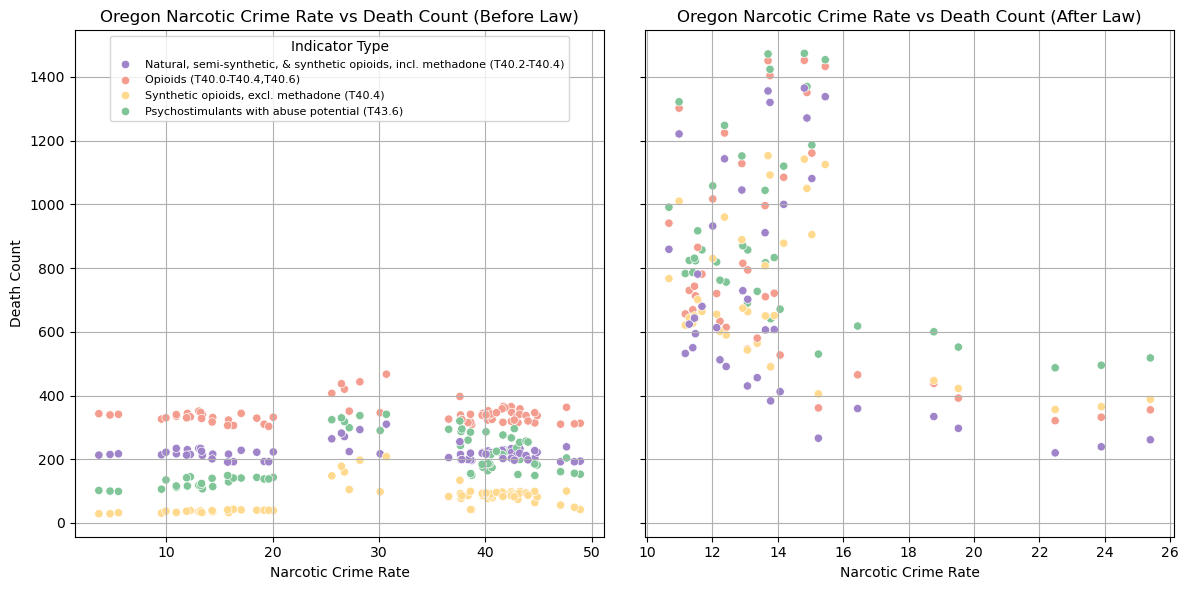

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

palette = ['#A084CA', '#F49C8E', '#FFDA8E', '#80C597']
oregon_pre_law = oregon_merged_opiods[oregon_merged_opiods['before_law'] == True]
oregon_post_law = oregon_merged_opiods[oregon_merged_opiods['before_law'] == False]

# Plot for pre-law data
sns.scatterplot(data=oregon_pre_law, x='oregon', y='data value', hue='indicator', ax=ax[0], palette=palette)
ax[0].legend(fontsize=8, loc='upper center', title='Indicator Type')
ax[0].set_xlabel('Narcotic Crime Rate')
ax[0].set_ylabel('Death Count')
ax[0].set_title('Oregon Narcotic Crime Rate vs Death Count (Before Law)')

# Plot for post-law data
sns.scatterplot(data=oregon_post_law, x='oregon', y='data value', hue='indicator', ax=ax[1], legend=False, palette=palette)
#ax[1].legend(fontsize=8, loc='upper center', bbox_to_anchor=(1.5, 1), title='After Decriminalization')
ax[1].set_xlabel('Narcotic Crime Rate')
ax[1].set_ylabel('Death Count')  # Remove redundant y-label to avoid clutter
ax[1].set_title('Oregon Narcotic Crime Rate vs Death Count (After Law)')
ax[0].grid(); ax[1].grid()
# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('CrimeVSDeath.png')

plt.show()


As we discussed in the exploration section, there appears to be a clear distinction in scatterplot trends before and after 2020. Let's examine the spearman correlation coefficients of each dataset. I am choosing to use the spearman coefficients because our relationship at right does not appear linear, and spearman measures monotonic relationship strength rather than purely linearity. Spearman testing assumes that our data points are independent of each other.

In [87]:
from scipy.stats import spearmanr

# spearman coefficient for both distributions
corr_pre, pval_pre = spearmanr(oregon_pre_law['oregon'], oregon_pre_law['data value']) # p val -> helps us answer if there is a significant relationship between crime rate and death count
corr_post, pval_post = spearmanr(oregon_post_law['oregon'], oregon_post_law['data value'])

print(f"Pre-2020 Correlation: {corr_pre}, p-value: {pval_pre}")
print(f"Post-2020 Correlation: {corr_post}, p-value: {pval_post}")

Pre-2020 Correlation: 0.08133969737027377, p-value: 0.1747066608429197
Post-2020 Correlation: -0.27677442050285184, p-value: 0.00055681922150799


In terms of the monotonic relationship that the spearman coefficient demonstrates, we see a very, very minimal positive correlation in the data between Oregon's narcotic crime rate and drug-related death counts before 2020 (0.081 is very close to 0). The p-value given by this correlation is 0.17, which is quite high (above both 0.05 and 0.1). From this, we fail to reject this other null hypothesis––suggesting that there is no strong monotonic relationship between narcotic crime rate and drug-related death counts before 2020.

However, looking at the correlation after 2020, we see something different. The post-2020 spearman correlation coefficent is -0.27, which indicates a weak, to potentially moderate, negative correlation between narcotic crime rates and drug-related death counts. The p-value given by this monotonic relationship test is 0.0005, which is much below an alpha value of either 0.10 and 0.05. From this, we can reject this other null hypothesis, and state that there is a statistically significant negative monotonic relationship between narcotic crime rates and drug-related death counts after the year 2020.

Because these two findings differ, we have supporting evidence for our main alternative hypothesis: there is a difference in the relationship between narcotic crime rates and death related drug counts before and after 2020 in Oregon; ie, more specifically, before 2020 there is no evidence of an association between these two variables, and after 2020 there is significant evidence of a weak negative relationship.

We can also include a Mann-Whitney U Statistic to determine how the distribution of drug-related death counts, generally, changed before and after 2020. Our null hypothesis here is that the distributions of death count in the pre-law and post-law groups are the same (i.e., there is no significant difference in death count between the two groups). Our alternative hypothesis here is that the distributions of death count in the pre-law and post-law groups are different (i.e., there is a significant difference in death count between the two groups).

In [88]:
import scipy.stats as stats

U_statistic, p_value = stats.mannwhitneyu(oregon_pre_law['data value'], oregon_post_law['data value'])

print(f'Mann-Whitney U Statistic: {U_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in death count between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in death count between the two groups.")


Mann-Whitney U Statistic: 711.5
P-Value: 7.267165761862142e-62
Reject the null hypothesis: There is a significant difference in death count between the two groups.


Because we rejected the null hypothesis in this scenario, we have found that there is a significant difference in death count between the two groups, before and after 2020.

### Conclusion & Limitations:

Clearly, there appear to be differences in our distributions depending on whether or not the data was before or after 2020. We have found through two spearman correlation tests that, while we found minimal evidence of any monotonic correlation between Oregon's narcotic crime rate and drug-related death rate before 2020, we found a negative, weak to moderate correlation between these two variables after 2020. In these different results, we found evidence that suggests the relationship between these two variables is distinct depending on whether the relationship was before or after 2020.

Additionally, we found that the distribution of our y-variable––drug related death counts––is different depending on whether the data is before or after 2020. There is a significant difference in death count distributions which are separated by before and after 2020.

From these findings, it is clear that our data is demonstrating distinct trends depending on whether we are observing data that is before or after Oregon's decriminalization laws. However, it would be naive not to think about factors other than decriminalization which might affect such a difference. A higher narcotic crime rate generally being associated with a lesser death count (after 2020) seems rather counterintuitive. However, as previously mentioned, it could be that the instances of drug use and resultant crimes are still happening, but are being recorded differently due to legislature. Additionally, with a variety of socioeconomic factors in fluctuation due to the pandemic, it is likely that other confounding variables could prompt a change in association between our variables. As demonstrated via our exploration, death generally increased in states other than Oregon after 2020 as well. It would be entirely naive to claim causation as a result of legislature. 

In conclusion, while we found a distinct change in the relationship between narcotic crime rates and drug-related death counts before and after 2020, we would need further research to fully describe the shift in trends over this time period.

## Step 3: Prediction

In the above sections, we determined that there is a significant difference in the relationship between narcotic crime rate and drug related deaths before and after 2020. More specifically, we observed a nonlinear relationship between narcotic crime rates and drug related deaths in Oregon, visually, after the year 2020. In the following cells, I will be attempting to find the best model to predict death counts based on narcotic crime rate in Oregon after the year 2020.

Initially, let's train a standard logistic model to the data, and use sklearn minimize to find the optimal parameters for such a model.

In [89]:
oregon_post_law.head()

,date,oregon,united states,oregon clearances,united states clearances,month_x,year,state,month_y,indicator,data value,numeric_month,before_law
32249,2020-11-01,22.48,18.81,17.10,14.06,11,2020,OR,November,"Synthetic opioids, excl. methadone (T40.4)",220.0,11.0,False
32251,2020-11-01,22.48,18.81,17.10,14.06,11,2020,OR,November,"Natural, semi-synthetic, & synthetic opioids, ...",321.0,11.0,False
32253,2020-11-01,22.48,18.81,17.10,14.06,11,2020,OR,November,Psychostimulants with abuse potential (T43.6),356.0,11.0,False
32255,2020-11-01,22.48,18.81,17.10,14.06,11,2020,OR,November,"Opioids (T40.0-T40.4,T40.6)",487.0,11.0,False
32787,2020-12-01,23.89,19.00,18.46,14.15,12,2020,OR,December,"Synthetic opioids, excl. methadone (T40.4)",239.0,12.0,False


In [91]:
from sklearn.preprocessing import MinMaxScaler

# normalize the death count
scaler = MinMaxScaler()
oregon_post_law['normalized_death'] = scaler.fit_transform(oregon_post_law[['data value']])

/var/folders/37/8z603jls5gn5kwj0gbhbsgy00000gn/T/ipykernel_56189/1695827542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_post_law['normalized_death'] = scaler.fit_transform(oregon_post_law[['data value']])


Next, we can define our logistic model as $f(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$


We also define a loss function for our logistic model, by making predictions based on our x values and chosed beta values, and then calculating the MSE under these beta values.

We will make an initial guess, and then using the minimize function, we will minimize the mean squared error of our model to get the optimal parameter values for $\beta_0$ and $\beta_1$.

Next, we can generate a range of x values along the range of our narcotic crime rate values, and then predict the death counts of these generated values, to plot the logistic regression fit given by our model. We will also plot the actual data behind our model.

Average Training MSE: 0.0549
Average Test MSE: 0.0561


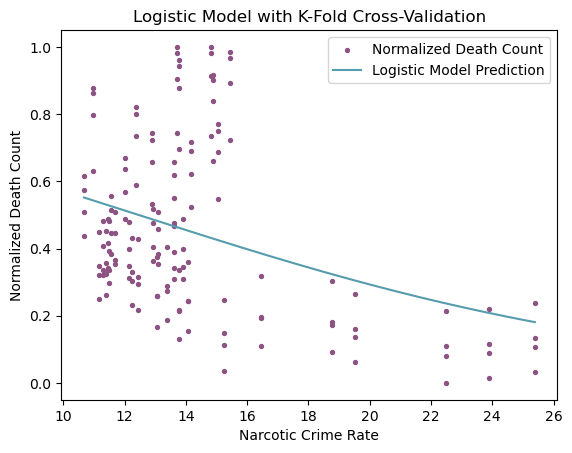

Final Model Parameters: beta0=1.4535, beta1=-0.1167


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define our logistic model
def logistic_model(x, beta0, beta1):
    return 1 / (1 + np.exp(-(beta0 + beta1 * x)))

# Define the loss function (MSE)
def logistic_loss(params, x, y):
    beta0, beta1 = params
    predictions = logistic_model(x, beta0, beta1)
    mse = np.mean((predictions - y) ** 2)  # Mean Squared Error
    return mse

# Load Data
x = oregon_post_law['oregon'].values
y = oregon_post_law['normalized_death'].values

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_mse_scores = []
test_mse_scores = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initial Guess for Parameters
    initial_guess = [0, 0]

    # Optimize Logistic Loss
    result = minimize(logistic_loss, initial_guess, args=(x_train, y_train), method='L-BFGS-B')
    beta0, beta1 = result.x

    # Predict on training and test sets
    y_train_pred = logistic_model(x_train, beta0, beta1)
    y_test_pred = logistic_model(x_test, beta0, beta1)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

# Compute average MSE for training and test sets
average_train_mse = np.mean(train_mse_scores)
average_test_mse = np.mean(test_mse_scores)

print(f"Average Training MSE: {average_train_mse:.4f}")
print(f"Average Test MSE: {average_test_mse:.4f}")

# Fit Final Model on Full Dataset
final_result = minimize(logistic_loss, initial_guess, args=(x, y), method='L-BFGS-B')
beta0_final, beta1_final = final_result.x

# Generate predictions for plotting
x_vals = np.linspace(min(x), max(x), 500)
y_pred = logistic_model(x_vals, beta0_final, beta1_final)

# Scatterplot of actual data
plt.scatter(x, y, color='#8C5383', s=8, label='Normalized Death Count')

# Logistic regression fit
plt.plot(x_vals, y_pred, color='#559CAD', label='Logistic Model Prediction')

# Labels and legend
plt.xlabel('Narcotic Crime Rate')
plt.ylabel('Normalized Death Count')
plt.legend()
plt.title('Logistic Model with K-Fold Cross-Validation')
plt.show()

print(f"Final Model Parameters: beta0={beta0_final:.4f}, beta1={beta1_final:.4f}")

I won't lie. The model looks pretty bad. It rides above most of the data when our narcotic crime rate is high, and does not curve with the lower end of narcotic crime rates. Even though 0.056 as a test mean squared error might seem low, because our error is standardized, this value is moderate. Visually we have also inspected that the fit is not great.

Let's try another model: exponential. I will basically undertake the same steps above, but on this alternate model.

Average Training MSE: 0.0559
Average Test MSE: 0.0571


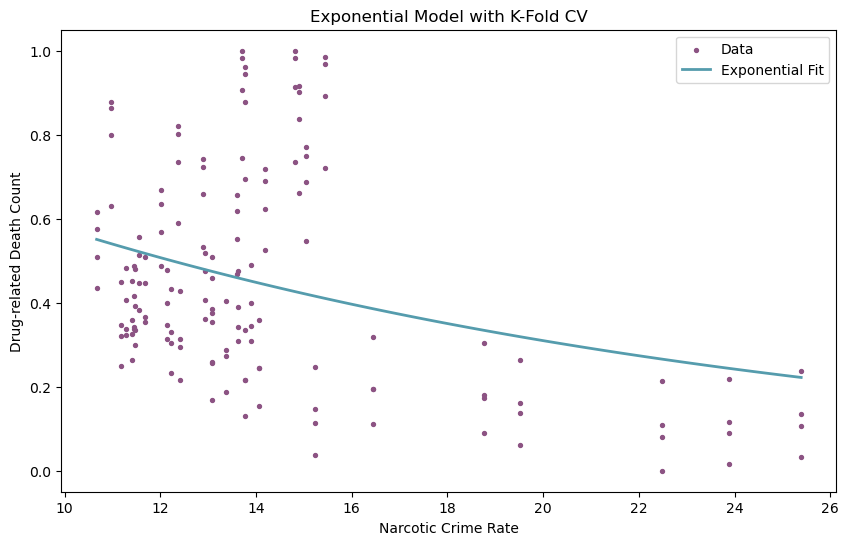

Final Model Parameters: a = 1.0641, b = -0.0617


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load data
x = oregon_post_law['oregon'].values
y = oregon_post_law['normalized_death'].values

# Define Exponential Model
def exponential_model(params, x):
    a, b = params
    return a * np.exp(b * x)

# Define MSE Loss Function for Exponential Model
def exp_loss_function(params, x, y):
    predictions = exponential_model(params, x)
    mse = np.mean((y - predictions) ** 2)
    return mse

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_mse_scores = []
test_mse_scores = []

# Initial guess for parameters (a, b)
initial_params = [10, 0]  

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Optimize model parameters for this fold
    result = minimize(exp_loss_function, initial_params, args=(x_train, y_train), method='BFGS')
    optimal_a, optimal_b = result.x

    # Predict on training and test sets
    y_train_pred = exponential_model([optimal_a, optimal_b], x_train)
    y_test_pred = exponential_model([optimal_a, optimal_b], x_test)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

# Compute average MSE for training and test sets
average_train_mse = np.mean(train_mse_scores)
average_test_mse = np.mean(test_mse_scores)

print(f"Average Training MSE: {average_train_mse:.4f}")
print(f"Average Test MSE: {average_test_mse:.4f}")

# Fit Final Model on Full Dataset
final_result = minimize(exp_loss_function, initial_params, args=(x, y), method='BFGS')
optimal_a_final, optimal_b_final = final_result.x

# Generate predictions for plotting
x_range = np.linspace(min(x), max(x), 100)  
y_pred = exponential_model([optimal_a_final, optimal_b_final], x_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', s=8, color='#8C5383')
plt.plot(x_range, y_pred, label='Exponential Fit', color='#559CAD', linewidth=2)
plt.xlabel('Narcotic Crime Rate')
plt.ylabel('Drug-related Death Count')
plt.title('Exponential Model with K-Fold CV')
plt.legend()
plt.show()

print(f"Final Model Parameters: a = {optimal_a_final:.4f}, b = {optimal_b_final:.4f}")


We are observing nearly the same model, and the error is performing worse. I will not bother plotting the residuals! Another model that I will try is the power model...

Average Training MSE: 94106.5796
Average Test MSE: 95960.1969


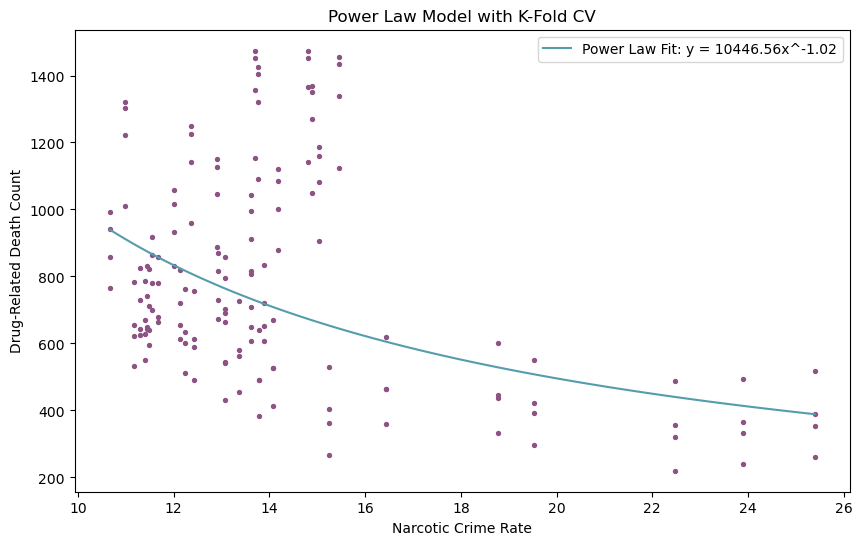

Final Model: y = 10446.5612 * x^-1.0174


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load data
x = oregon_post_law['oregon'].values.reshape(-1, 1)
y = oregon_post_law['data value'].values

# Apply log transformation
x_log = np.log(x)
y_log = np.log(y)

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_mse_scores = []
test_mse_scores = []

for train_index, test_index in kf.split(x_log):
    x_train, x_test = x_log[train_index], x_log[test_index]
    y_train, y_test = y_log[train_index], y_log[test_index]

    # Train Linear Model in Log-Log Space
    pmodel = LinearRegression()
    pmodel.fit(x_train, y_train)

    # Predict in Log-Log Space
    y_train_pred_log = pmodel.predict(x_train)
    y_test_pred_log = pmodel.predict(x_test)

    # Convert back to original scale
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)

    # Compute MSE
    train_mse = mean_squared_error(np.exp(y_train), y_train_pred)
    test_mse = mean_squared_error(np.exp(y_test), y_test_pred)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

# Compute average MSE for training and test sets
average_train_mse = np.mean(train_mse_scores)
average_test_mse = np.mean(test_mse_scores)

print(f"Average Training MSE: {average_train_mse:.4f}")
print(f"Average Test MSE: {average_test_mse:.4f}")

# Fit Final Model on Full Dataset
final_model = LinearRegression()
final_model.fit(x_log, y_log)

# Extract parameters
beta0 = np.exp(final_model.intercept_)
beta1 = final_model.coef_[0]

# Generate smooth predictions
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
log_x_range = np.log(x_range)  
log_y_range_pred = final_model.predict(log_x_range)
y_range_pred = np.exp(log_y_range_pred)  

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='#8C5383', s=8)
plt.plot(x_range, y_range_pred, label=f'Power Law Fit: y = {beta0:.2f}x^{beta1:.2f}', color='#559CAD')
plt.legend(loc='upper right')
plt.xlabel('Narcotic Crime Rate')
plt.ylabel('Drug-Related Death Count')
plt.title('Power Law Model with K-Fold CV')
plt.show()

print(f"Final Model: y = {beta0:.4f} * x^{beta1:.4f}")



Visually, this appears to be our best model. Our mean squared error is still exceptionally high, this time on a different scale due to the fact that our y axis is no longer standardized for sake of encountering error.

After trying these 3 models (and more that I will not be showing because they were equally poor, plus doing work regularizing/transforming my data that additionally did not really help), I have come to the conclusion that either:
* The relationship present between narcotic crime rate and death count is exceptionally weak, which makes it difficult to train an appropriate model on
    * An aspect that I can see is there is a clear difference, visually, between narcotic crime rates above or below 16; perhaps a piecewise function could aid this, but I suspect that the data on either side would not follow any trend
* The models I have selected are either not appropriate for demonstrating this relationship, or need more fine tuning of the hyperparameters/better initial guesses or boundaries to derive meaningful predictions from
* A combination of the two limitations described above

In conclusion, I was largely unable to predict death counts based on narcotic crime rates after 2020 with my logistic, exponential, or power law modeling. The model which performed best was the power law model, but I would still not call this a good model for our data.

Although we determined in the inference section that after 2020 in Oregon there is most likely a negative monotonic relationship between narcotic crime rate and drug-related deaths (at least a very weak one), I have yet to find a meaningful model to capture this relationship. 

While my predictors may not be exceptionally strong, I still enjoyed deriving insights from exploring these two datasets and found this project quite interesting!